In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/tanzinazaman/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
parent_df = pd.read_csv('expedia_train.csv')

In [3]:
#Dimention of Data frame
parent_df.shape

(37670293, 24)

In [20]:
#check data types
parent_df.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [4]:
# Attributes of the data frame and its first five entries.
parent_df.head(5).transpose()

,0,1,2,3,4
date_time,2014-08-11 07:46:59,2014-08-11 08:22:12,2014-08-11 08:24:33,2014-08-09 18:05:16,2014-08-09 18:08:18
site_name,2,2,2,2,2
posa_continent,3,3,3,3,3
user_location_country,66,66,66,66,66
user_location_region,348,348,348,442,442
user_location_city,48862,48862,48862,35390,35390
orig_destination_distance,2234.26,2234.26,2234.26,913.193,913.626
user_id,12,12,12,93,93
is_mobile,0,0,0,0,0
is_package,1,1,0,0,0


In [16]:
# Find which columns have NaN values 
print parent_df.isnull().any()

date_time                    False
site_name                    False
posa_continent               False
user_location_country        False
user_location_region         False
user_location_city           False
orig_destination_distance     True
user_id                      False
is_mobile                    False
is_package                   False
channel                      False
srch_ci                       True
srch_co                       True
srch_adults_cnt              False
srch_children_cnt            False
srch_rm_cnt                  False
srch_destination_id          False
srch_destination_type_id     False
is_booking                   False
cnt                          False
hotel_continent              False
hotel_country                False
hotel_market                 False
hotel_cluster                False
dtype: bool


In [9]:
# Attributes of the data frame and its first last entries.
parent_df['hotel_cluster'].value_counts().head(10)

91    1043720
41     772743
48     754033
64     704734
65     670960
5      620194
98     589178
59     570291
42     551605
21     550092
Name: hotel_cluster, dtype: int64

In [31]:
#calculate the number of click events in train set
click_count = parent_df[parent_df.is_booking == 0]
print len(click_count)

34669600


In [14]:
# Number of unique user in the dataset
unique_users = parent_df.user_id.unique()
print len(unique_users)

1198786


In [15]:
#Correlation check among attributes 
parent_df.corr()["hotel_cluster"]

site_name                   -0.022408
posa_continent               0.014938
user_location_country       -0.010477
user_location_region         0.007453
user_location_city           0.000831
orig_destination_distance    0.007260
user_id                      0.001052
is_mobile                    0.008412
is_package                   0.038733
channel                      0.000707
srch_adults_cnt              0.012309
srch_children_cnt            0.016261
srch_rm_cnt                 -0.005954
srch_destination_id         -0.011712
srch_destination_type_id    -0.032850
is_booking                  -0.021548
cnt                          0.002944
hotel_continent             -0.013963
hotel_country               -0.024289
hotel_market                 0.034205
hotel_cluster                1.000000
Name: hotel_cluster, dtype: float64

In [22]:
# Convert the date_time entry into year, month, day and day of week
parent_df["date_time"] = pd.to_datetime(parent_df["date_time"])
parent_df["year"] = parent_df["date_time"].dt.year
parent_df["month"] = parent_df["date_time"].dt.month
parent_df['day'] = parent_df["date_time"].dt.day
parent_df['day of week'] = parent_df["date_time"].dt.weekday

In [28]:
#Calculate the duration of stay at the hotel
parent_df["srch_ci"] = pd.to_datetime(parent_df["srch_ci"], format='%Y-%m-%d', errors="coerce")
parent_df["srch_co"] = pd.to_datetime(parent_df["srch_co"], format='%Y-%m-%d', errors="coerce")
parent_df['stay_duration'] =(parent_df['srch_co']-parent_df['srch_ci']).astype('timedelta64[D]')

In [29]:
parent_df.head(5).transpose()

,0,1,2,3,4
date_time,2014-08-11 07:46:59,2014-08-11 08:22:12,2014-08-11 08:24:33,2014-08-09 18:05:16,2014-08-09 18:08:18
site_name,2,2,2,2,2
posa_continent,3,3,3,3,3
user_location_country,66,66,66,66,66
user_location_region,348,348,348,442,442
user_location_city,48862,48862,48862,35390,35390
orig_destination_distance,2234.26,2234.26,2234.26,913.193,913.626
user_id,12,12,12,93,93
is_mobile,0,0,0,0,0
is_package,1,1,0,0,0


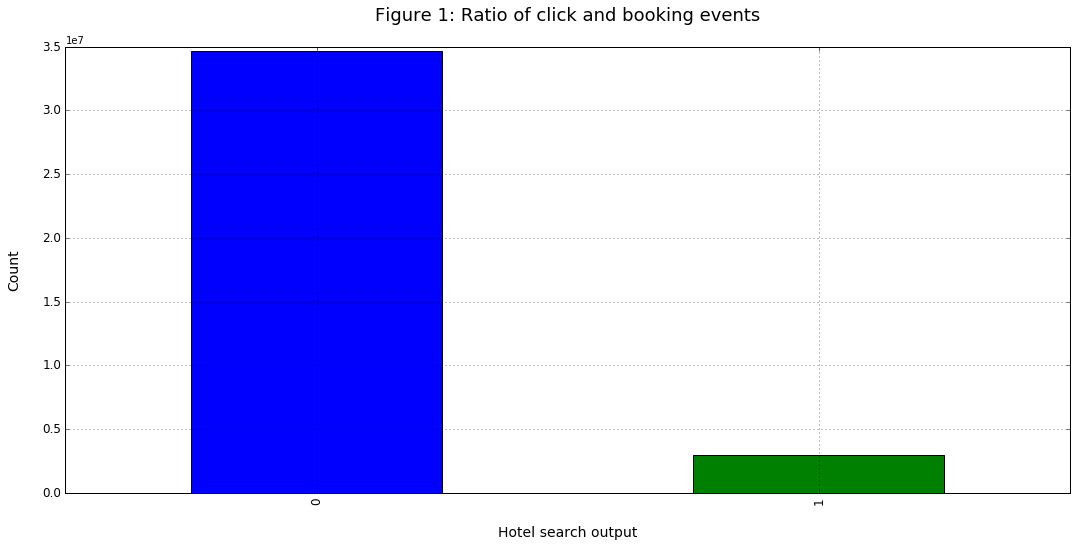

In [48]:
# Count of click and booking event
plot_booking = parent_df.is_booking.value_counts().sort_index().plot(kind = 'bar',figsize = (18,8),color = ['b','g'], 
                                                             ylim = (0,35000000),fontsize = 12,grid=True)
plot_booking.set_xlabel('\nHotel search output',fontsize = 14 )
plot_booking.set_ylabel('Count\n',fontsize = 14 )
plot_booking.set_title('Figure 1: Ratio of click and booking events\n',fontsize = 18)   
#save image
fig = plot_booking.get_figure()
fig.savefig('Fig1.png', dpi=300, bbox_inches='tight')

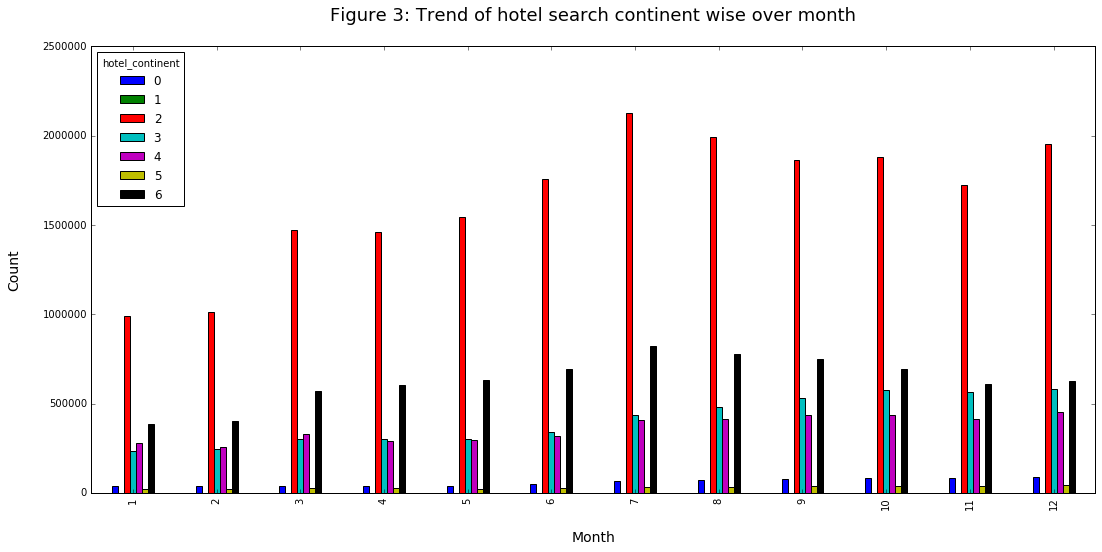

In [67]:
df_booking = parent_df.groupby(['month','hotel_continent']).size()
df_booking = df_booking.unstack('hotel_continent')
plot2 = df_booking.plot(kind = 'bar',figsize = (18,8))
plot2.set_xlabel('\nMonth',fontsize = 14 )
plot2.set_ylabel('Count\n',fontsize = 14 )
plot2.set_title('Figure: Trend of hotel search continent wise over month\n',fontsize = 18)  
fig = plot2.get_figure()
fig.savefig('Fig3.png', dpi=300, bbox_inches='tight')

In [54]:
fig = plot2.get_figure()
fig.savefig('Fig2.png', dpi=300, bbox_inches='tight')

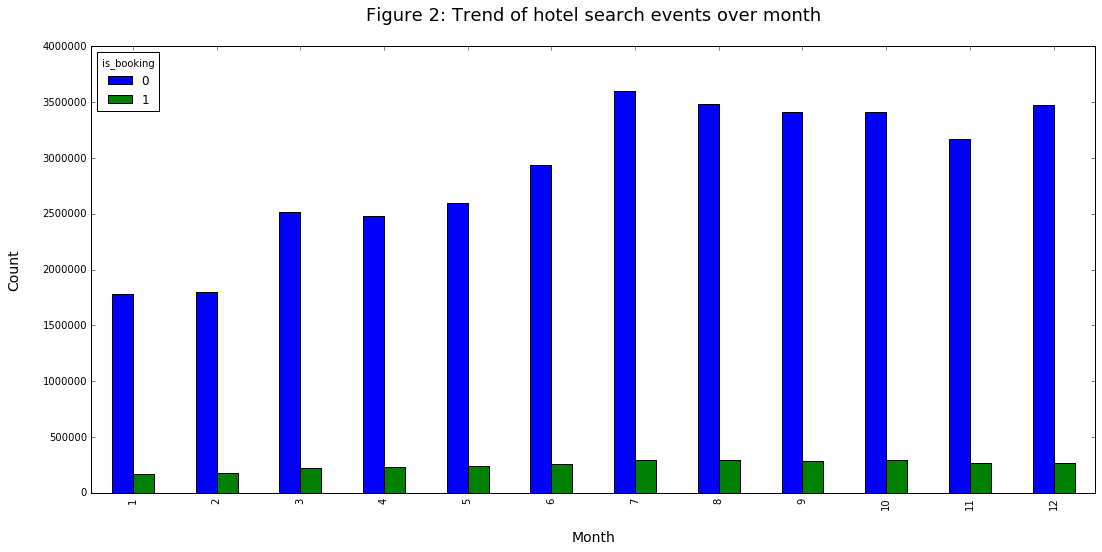

In [58]:
df_booking = parent_df.groupby(['month','is_booking',]).size()
df_booking = df_booking.unstack('is_booking')
plot2 = df_booking.plot(kind = 'bar',figsize = (18,8))
plot2.set_xlabel('\nMonth',fontsize = 14 )
plot2.set_ylabel('Count\n',fontsize = 14 )
plot2.set_title('Figure: Trend of hotel search events over month\n',fontsize = 18)  

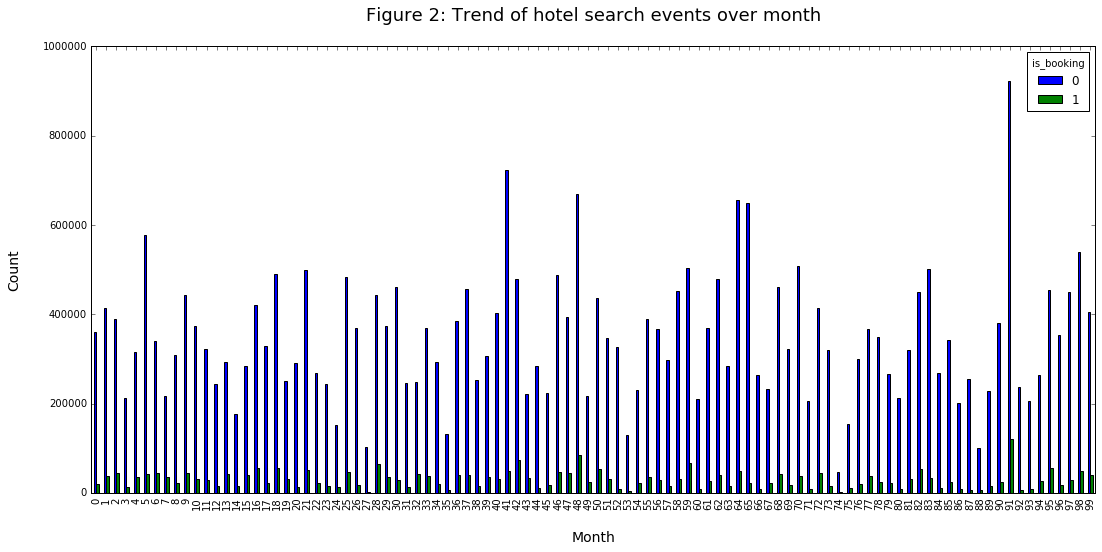

In [66]:
df_booking = parent_df.groupby(['is_booking','hotel_cluster']).size()
df_booking = df_booking.unstack('is_booking')
plot2 = df_booking.plot(kind = 'bar',figsize = (18,8))
plot2.set_xlabel('\nMonth',fontsize = 14 )
plot2.set_ylabel('Count\n',fontsize = 14 )
plot2.set_title('Figure 2: Trend of hotel search events over month\n',fontsize = 18)  

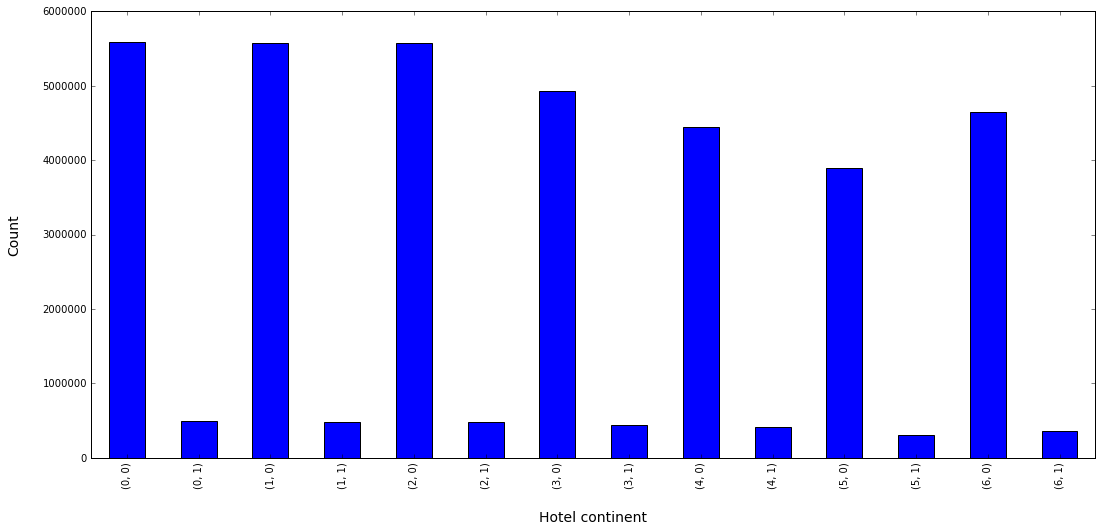

In [71]:
df_booking = parent_df.groupby(['day of week','is_booking']).size()
#df_booking = df_booking.unstack('hotel_country')
plot2 = df_booking.plot(kind = 'bar',figsize = (18,8),stacked = True)
plot2.set_xlabel('\nHotel continent',fontsize = 14 )
plot2.set_ylabel('Count\n',fontsize = 14 )

In [77]:
keep_col = ['day of week','year','month','day', 'hotel_cluster','is_booking']
book= parent_df.loc[:,(keep_col)]

In [78]:
book_agg = book.groupby(['day of week','year','month','day', 'hotel_cluster']).agg(['sum', 'count'] )
book_agg.columns = ('booking','total')

,day of week,year,month,day,hotel_cluster,is_booking
0,0,2014,8,11,1,0
1,0,2014,8,11,1,1
2,0,2014,8,11,1,0
3,5,2014,8,9,80,0
4,5,2014,8,9,21,0


In [79]:
book_agg.head(5)

booking  total
day of week year month day hotel_cluster                
0           2013 1     7   0                   16    371
                           1                   68    640
                           2                   59    414
                           3                   28    341
                           4                   34    276

In [80]:
book_agg_1 = book_agg.groupby(level=0).agg(['sum'] )
book_agg_1.columns = ('bookings', 'total')
book_agg_1.head()

,bookings,total
day of week,,
0,490445,6078350
1,488571,6065976
2,487537,6060134
3,445099,5378831
4,418085,4866935


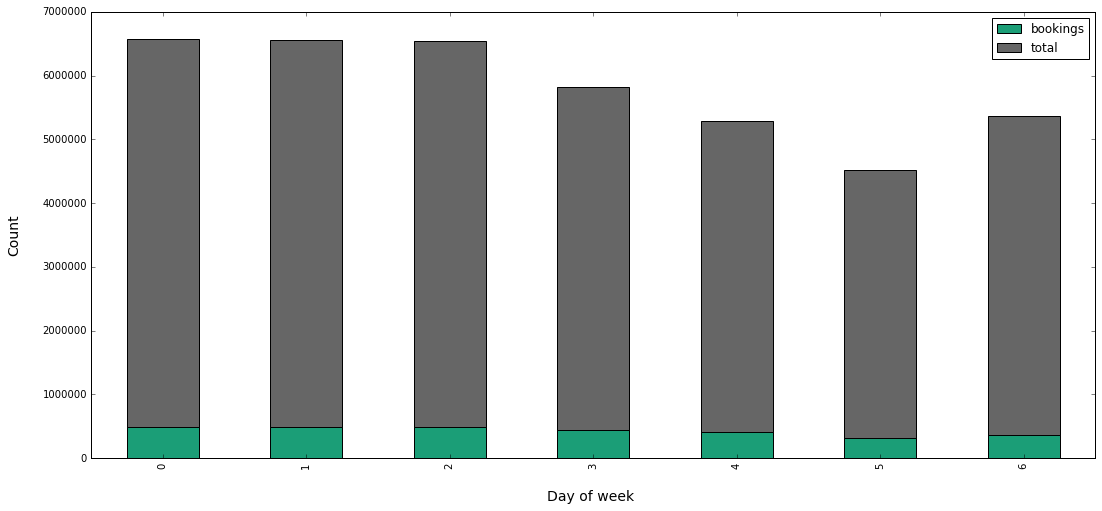

In [86]:
plot3 = book_agg_1.plot( kind = 'bar', stacked = True,figsize = (18,8),colormap = 'Dark2')
plot3.set_xlabel('\nDay of week ',fontsize = 14 )
plot3.set_ylabel('Count\n',fontsize = 14 )

In [87]:
fig = plot3.get_figure()
fig.savefig('Fig4.png', dpi=300, bbox_inches='tight')

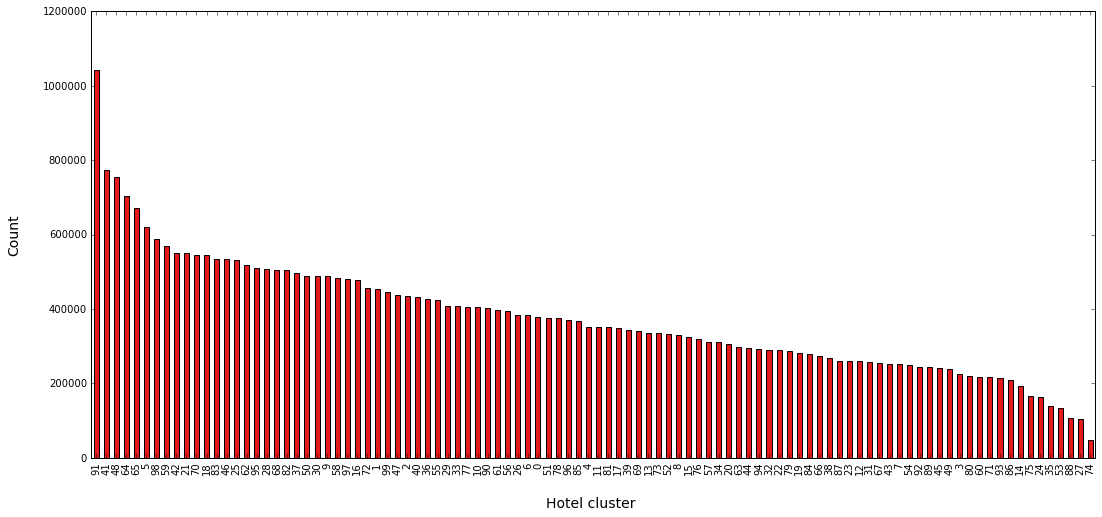

In [98]:
# Count of hotels in each cluster
plot1 = book['hotel_cluster'].value_counts().plot(kind = 'bar',figsize = (18,8),colormap = 'Set1')
plot1.set_xlabel('\nHotel cluster ',fontsize = 14 )
plot1.set_ylabel('Count\n',fontsize = 14 )

In [99]:
fig = plot1.get_figure()
fig.savefig('Fig5.png', dpi=300, bbox_inches='tight')